# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB , ComplementNB

from sklearn.model_selection import train_test_split

### Importing Data

In [2]:
df = pd.read_csv('pca_result_final.csv')

### Spliting the data

In [54]:
y = df['Popularity']
X = df.iloc[:, :-1]
X.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,...,PCA_Component_163,PCA_Component_164,PCA_Component_165,PCA_Component_166,PCA_Component_167,PCA_Component_168,PCA_Component_169,PCA_Component_170,PCA_Component_171,PCA_Component_172
0,1.192585,-0.493574,8.113930,-1.569679,9.788204,3.487335,-1.672694,-6.586220,2.060303,-2.422188,...,-0.482095,0.332489,0.464386,1.230539,-0.611371,-1.115768,-0.399166,-0.285042,0.455709,-1.238018
1,-1.493374,-9.659196,2.974541,-3.565624,3.383301,2.762491,3.480449,-1.408709,-0.504872,-0.748474,...,1.652883,0.230533,0.967106,0.264426,-0.935155,-0.658395,0.377542,0.806267,1.176376,-0.151016
2,-1.832774,0.307272,-5.421584,6.261786,1.019203,-4.947854,2.723812,-3.359720,-1.739612,0.619791,...,-0.886912,0.016115,0.833454,-0.318620,-0.727655,-0.359413,0.438661,-0.309570,0.322236,-0.134751
3,-6.957596,-0.672203,3.249920,4.851568,-8.300714,-1.215876,1.459186,-2.817143,-4.418289,2.908513,...,-0.368224,0.458964,-1.335819,-0.746145,0.563348,0.354818,0.062782,0.186058,0.882891,-0.052429
4,3.871830,-6.572552,-3.034643,-5.986337,-1.911559,-5.172729,-3.186945,1.327184,1.572709,3.002748,...,-0.235406,0.698061,0.952425,-0.402112,-0.145772,0.575649,0.325662,0.237017,-0.473411,-0.181295


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

## Gaussian Naive Bayes Model

In [56]:
GNBM = GaussianNB()
GNBM.fit(X_train, y_train)
y_pred = GNBM.predict(X_test)
f1_score_value = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1_score_value))

F1 score: 0.63


In [6]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47        69
           1       0.62      0.64      0.63        96

    accuracy                           0.56       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.56      0.56      0.56       165



### Plotting ROC 

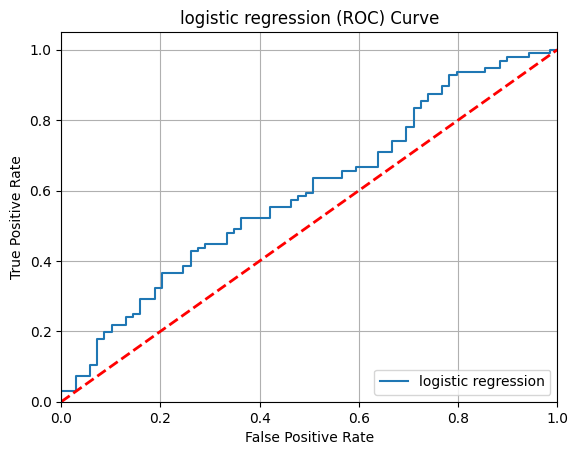

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

auc_score = roc_auc_score(y_test, GNBM.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNBM.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'logistic regression' )
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('logistic regression (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

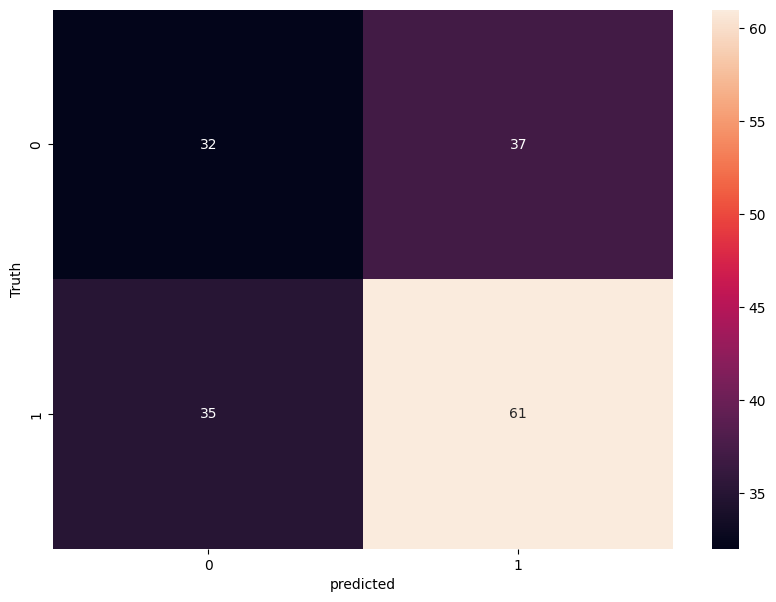

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

## Try other Naive Bayes Model

### Bernoulli Naive Bayes Model

In [16]:
BNBM = BernoulliNB()
BNBM.fit(X_train, y_train)
y_pred = BNBM.predict(X_test)
print('F1 score: ', metrics.f1_score(y_test,y_pred))

F1 score:  0.5411764705882353


In [17]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.45      0.59      0.51        69
           1       0.62      0.48      0.54        96

    accuracy                           0.53       165
   macro avg       0.54      0.54      0.53       165
weighted avg       0.55      0.53      0.53       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

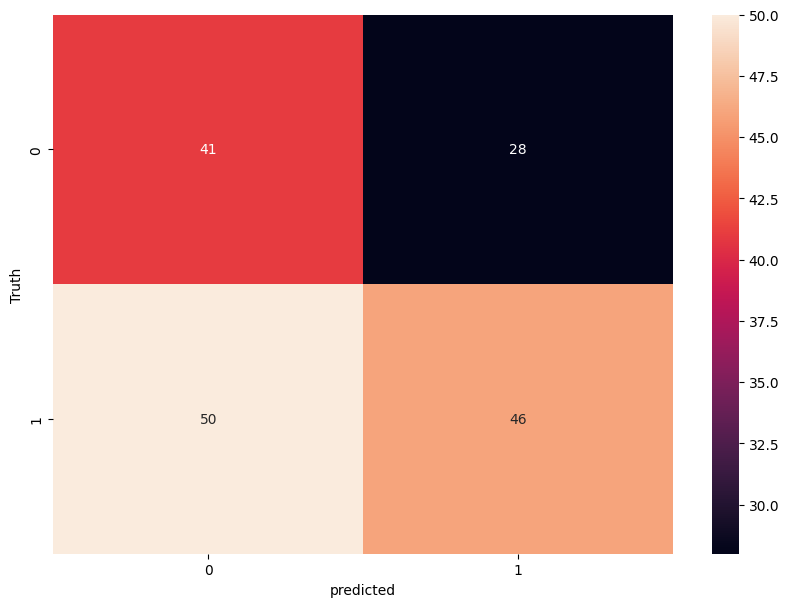

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

This had a less f1_score than the Gaussian.


The other Naive Bayes Models do not work with negative values exist in the data, so I will try them when using the MinMaxScaler Later down

## Now trying To inprove the model preformance (hyperparameter tuning)

### Trying Scaling the data

#### StanderdScaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
GNBMS = GaussianNB()
GNBMS.fit(X_train_scaled, y_train)
y_pred = GNBMS.predict(X_test_scaled)
f1_score_value = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1_score_value))

F1 score: 0.63


In [22]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47        69
           1       0.62      0.64      0.63        96

    accuracy                           0.56       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.56      0.56      0.56       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

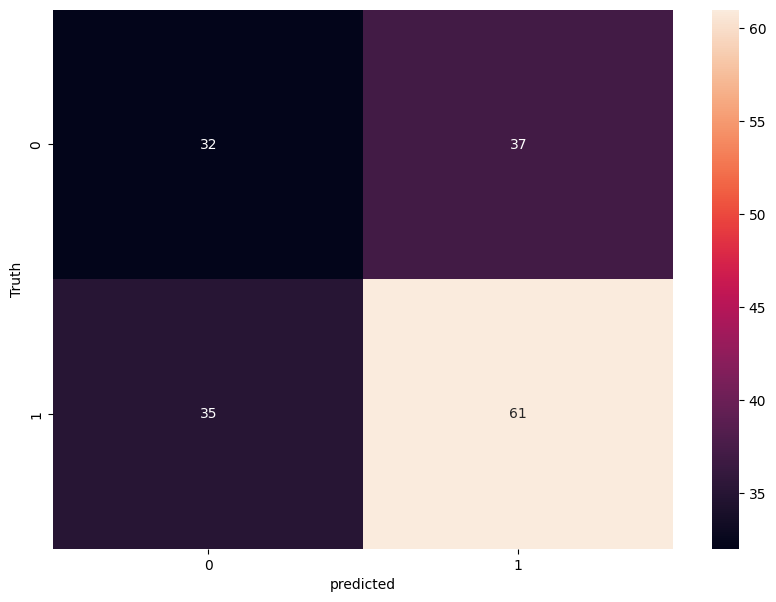

In [23]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

StandardScaler do nothing to improve the model's f1_score

#### MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
GNBMS = GaussianNB()
GNBMS.fit(X_train_scaled, y_train)
y_pred = GNBMS.predict(X_test_scaled)
f1_score_value = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1_score_value))

F1 score: 0.63


In [26]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47        69
           1       0.62      0.64      0.63        96

    accuracy                           0.56       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.56      0.56      0.56       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

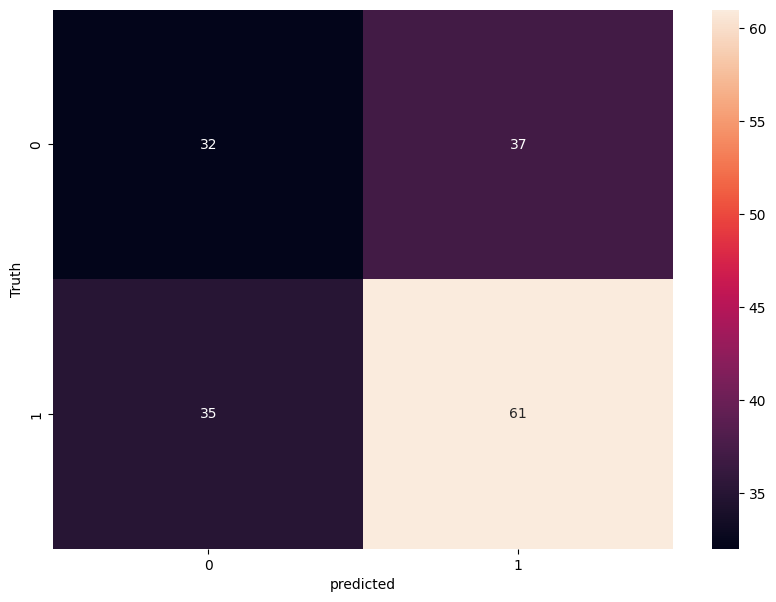

In [27]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

MinMaxScaler do nothing to improve the model f1_score

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Here we will try to use the other types of Naive Bayes Models

Multinomial Naive Bayes

In [28]:
MNBMS = MultinomialNB()
MNBMS.fit(X_train_scaled, y_train)
y_pred = MNBMS.predict(X_test_scaled)
f1_score_value = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1_score_value))

F1 score: 0.04


In [29]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.42      0.99      0.59        69
           1       0.67      0.02      0.04        96

    accuracy                           0.42       165
   macro avg       0.54      0.50      0.31       165
weighted avg       0.56      0.42      0.27       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

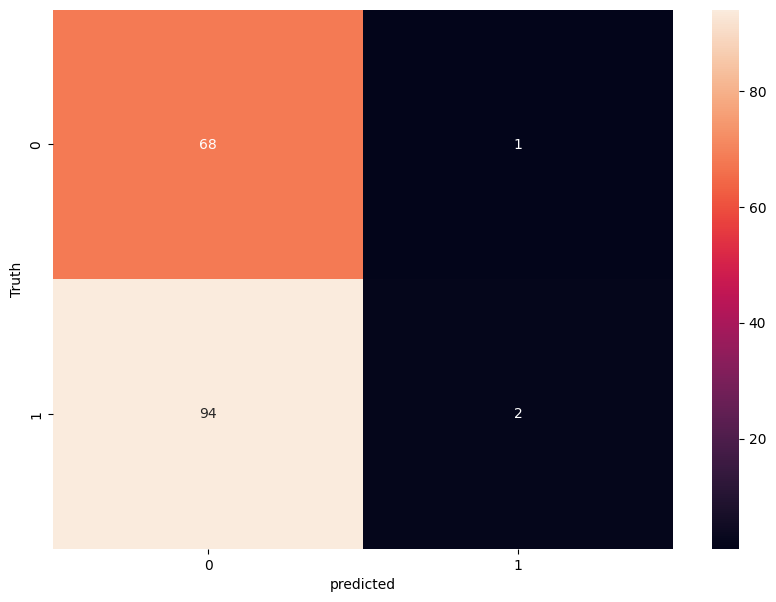

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

MultinomialNB makes the f1_score very bad

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Complement Naive Bayes

In [31]:
CNBMS = ComplementNB()
CNBMS.fit(X_train_scaled, y_train)
y_pred = CNBMS.predict(X_test_scaled)
f1_score_value = metrics.f1_score(y_test, y_pred)
print('F1 score: {:.2f}'.format(f1_score_value))

F1 score: 0.56


In [32]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.45      0.55      0.50        69
           1       0.62      0.52      0.56        96

    accuracy                           0.53       165
   macro avg       0.53      0.54      0.53       165
weighted avg       0.55      0.53      0.54       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

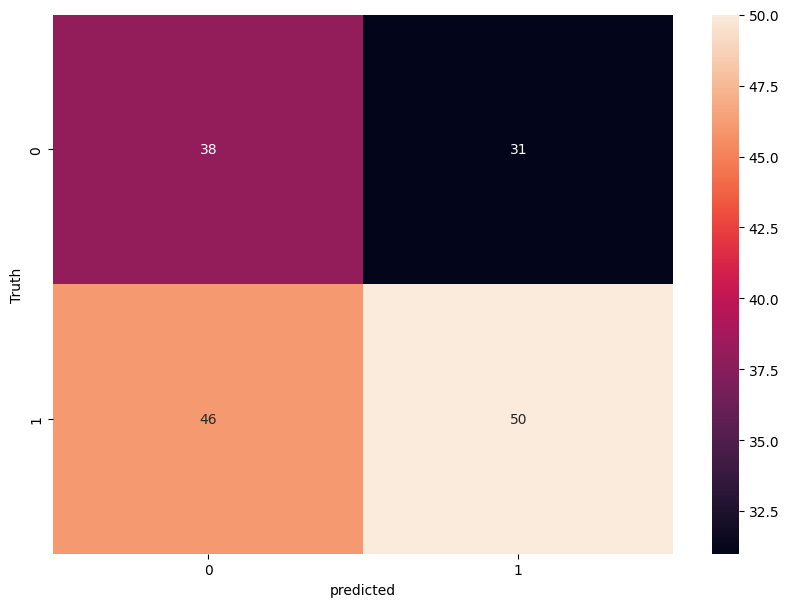

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

ComplementNB do not make the situation more good

### Try the bagging technique to improve the f1_score

In [34]:
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

base_model = GaussianNB()

bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=28)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.47      0.51      0.49        69
           1       0.62      0.58      0.60        96

    accuracy                           0.55       165
   macro avg       0.54      0.55      0.54       165
weighted avg       0.56      0.55      0.55       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

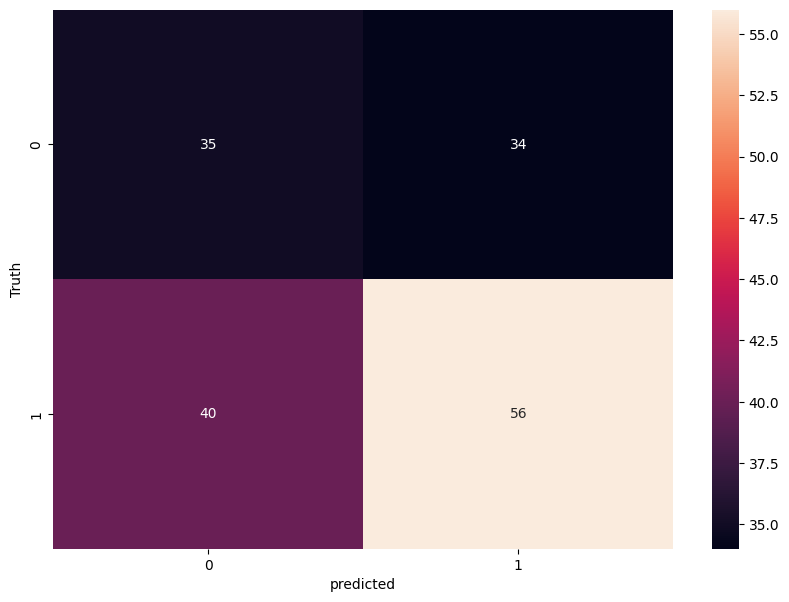

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

here the pagging leads to:
> f1_score for class 1 become 60% insted of 63%


> f1_score for class 0 become 49% insted of 47%


so bagging make the situation worth

### As we see before the GaussianNB is the best one to work with so now we will try to improve it

### The Grid Search technique to improve the f1_score

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=11)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

score_5 = metrics.f1_score(y_pred, y_test)
print ("after bagging F1 score: {: .2f}".format(score_5))

Best hyperparameters:  {'var_smoothing': 0.1873817422860384}
Best accuracy:  0.5038520801232665
after bagging F1 score:  0.70


In [38]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.56      0.39      0.46        69
           1       0.64      0.78      0.70        96

    accuracy                           0.62       165
   macro avg       0.60      0.59      0.58       165
weighted avg       0.61      0.62      0.60       165



#### Plotting confusion_matrix 

Text(95.72222222222221, 0.5, 'Truth')

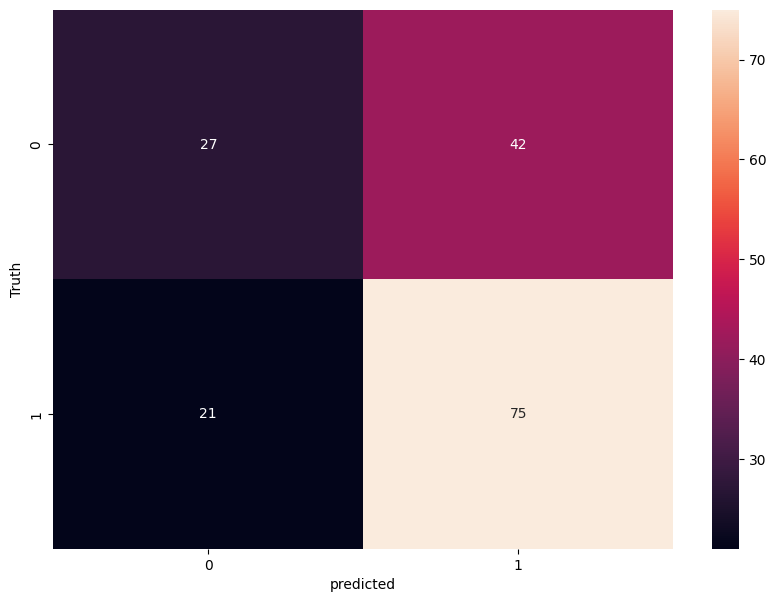

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

here the Grid Search leads to:
> f1_score for class 1 become 70% insted of 63%


> f1_score for class 0 become 46% insted of 47%


So Grid Search also make the situation worth

### Train multiple Naive Bayes models using bagging a manual way that increases the f1_score

In [40]:
# Number of models in the ensemble
n_models = 10
random_state_values = [4, 67, 28, 54, 26, 58, 2, 15, 31, 55]

# List to store the models
models = []

# Train multiple Naive Bayes models using bagging
for i in range(n_models):
    # Create a random subset of the data with replacement       # 3 , 7 , 10 , 20        58 , 56 , 54 , 55 , 56 , 56 
    xtrain,xtest, ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=random_state_values[i]) #55 , 47 ,  8  , 13 , 43 , 23 
    
    
    # Create a  model
    model = GaussianNB()
    
    # Train the model on the random subset
    model.fit(xtrain, ytrain)
    
    # Add the model to the list
    models.append(model)

# Make predictions using the ensemble of models
y_preds = np.zeros((len(xtest), n_models))
for i, model in enumerate(models):
    y_preds[:, i] = model.predict(xtest)

# Final prediction using majority voting
final_prediction = np.round(np.mean(y_preds, axis=1))

# Evaluate the ensemble model's performance
accuracy = metrics.accuracy_score(ytest, final_prediction)
f1 = metrics.f1_score(ytest, final_prediction)
print("Ensemble Model Accuracy:", f1)

Ensemble Model Accuracy: 0.7674418604651162


In [41]:
print(classification_report(ytest, final_prediction, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75        85
           1       0.72      0.82      0.77        80

    accuracy                           0.76       165
   macro avg       0.76      0.76      0.76       165
weighted avg       0.76      0.76      0.76       165



Text(95.72222222222221, 0.5, 'Truth')

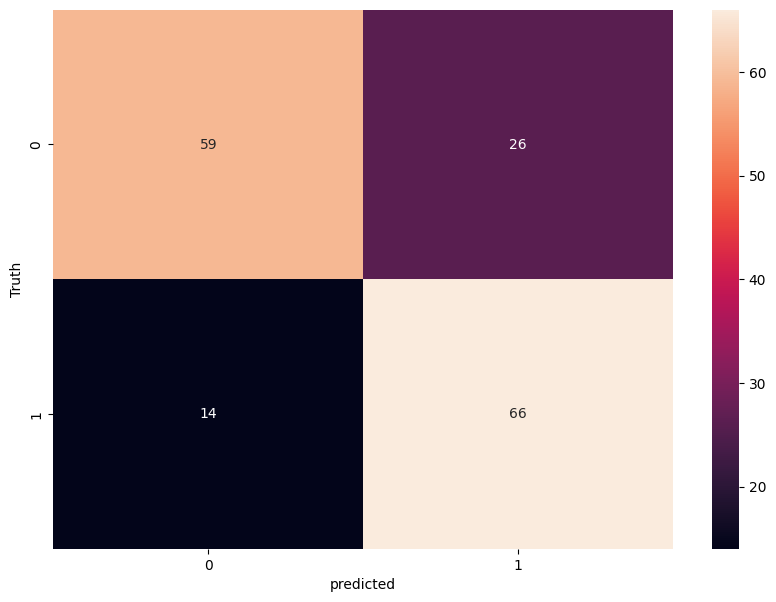

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, final_prediction)
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

even after this way givs the most perefect score, but we know that its not acceptable to get the best score as the result of 10 times training the model.

### now tring to cange the defualt values of the model it self

In [43]:
GNBM = GaussianNB(priors=[0.1, 0.9])
GNBM.fit(X_train, y_train)
y_pred = GNBM.predict(X_test)
print('F1 score: ', metrics.f1_score(y_test,y_pred))

F1 score:  0.7368421052631577


In [44]:
print(classification_report(y_test,y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.64      0.13      0.22        69
           1       0.60      0.95      0.74        96

    accuracy                           0.61       165
   macro avg       0.62      0.54      0.48       165
weighted avg       0.62      0.61      0.52       165



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [45]:
GNBM = GaussianNB(priors=[0.2, 0.8])
GNBM.fit(X_train, y_train)
y_pred = GNBM.predict(X_test)
print('F1 score: ', metrics.f1_score(y_test,y_pred))

F1 score:  0.7288135593220338


In [46]:
print(classification_report(y_test,y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.60      0.22      0.32        69
           1       0.61      0.90      0.73        96

    accuracy                           0.61       165
   macro avg       0.61      0.56      0.52       165
weighted avg       0.61      0.61      0.56       165



bad results

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [47]:
GNBM = GaussianNB(priors=[0.3, 0.7])
GNBM.fit(X_train, y_train)
y_pred = GNBM.predict(X_test)
print('F1 score: ', metrics.f1_score(y_test,y_pred))

F1 score:  0.7111111111111112


In [48]:
print(classification_report(y_test,y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        69
           1       0.62      0.83      0.71        96

    accuracy                           0.61       165
   macro avg       0.59      0.56      0.55       165
weighted avg       0.59      0.61      0.57       165



bad results

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [49]:
GNBM = GaussianNB(priors=[0.3, 0.7], var_smoothing=1)
GNBM.fit(X_train, y_train)
y_pred = GNBM.predict(X_test)
print('F1 score: ', metrics.f1_score(y_test,y_pred))

F1 score:  0.735632183908046


In [50]:
print(classification_report(y_test,y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.58      1.00      0.74        96

    accuracy                           0.58       165
   macro avg       0.29      0.50      0.37       165
weighted avg       0.34      0.58      0.43       165



C:\Users\moham\anaconda_true\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda_true\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\moham\anaconda_true\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

very bad results

by continue trying different possible values we will not get ang good resu;ts, all is bad or at least one or two of them the same as one of the results we got befor

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## BaggingClassifier to improve Naive Bayes f1_score

In [57]:
# Create a bagging classifier                     13  , 
bagging = BaggingClassifier(base_estimator=GNBM, n_estimators=13, random_state=106)  # 50  ,  60  , 88  , 90  , 106..  , 

# Fit the bagging classifier to the training data
bagging.fit(X_train, y_train)

# Predict on the test data using the bagging classifier
y_pred = bagging.predict(X_test)

# Calculate the accuracy score of the bagging classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Bagging accuracy: ", accuracy)

score_4 = metrics.f1_score(y_pred, y_test)
print ("after bagging F1 score: {: .2f}".format(score_4))

Bagging accuracy:  0.6060606060606061
after bagging F1 score:  0.67


C:\Users\moham\anaconda_true\envs\tensorflow_env\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [58]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51        69
           1       0.65      0.69      0.67        96

    accuracy                           0.61       165
   macro avg       0.59      0.59      0.59       165
weighted avg       0.60      0.61      0.60       165



this is the best scores ever, and the most balanced one

## So acorrding to what mintioned in this noteboot the best acceptable result we got by appling BaggingClassifier to Gaussian Naive Bayes, which is:
    67% for f1_score
    61% for accuracy